# Планирование рекламной кампании на 2017 год.

Исследование для интернет-магазина «Стримчик», который продаёт по всему миру компьютерные игры. 

Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.


Есть данные до 2016 года. Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. 

План исследования:
1. Получение данных
2. Подготовка данных
3. Исследовательский анализ данных
 - Количество игр, выпущенных в разные годы.
 - Определение актуального периода.
 - Выбор  потенциально прибыльных платформ.
 - Влияние на продажи отзывов пользователей и критиков.
 - Выделение самых прибыльных жанров.
4. Портрет пользователя каждого региона (NA, EU, JP)
 - Самые популярные платформы (топ-5)
 - Самые популярные жанры (топ-5)
 - Влияние рейтинга ESRB на продажи
5. Проверка гипотез
 - Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
 - Средние пользовательские рейтинги жанров Action и Sports разные.


## Подготовка данных


In [1]:
import pandas as pd #импорт библиотек

import numpy as np

from scipy import stats as st

import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt

import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

### Получение данных

Чтение файлов с данными и сохранение в датафреймы.

In [2]:
try: # чтение файла с сайта
    games = pd.read_csv('/datasets/games.csv')
except: # чтение файла локально
    games = pd.read_csv('datasets/games.csv')

Посмотрим на полученные данные.

In [3]:
display(games.head())
print('--------------------------------------')
print('Размер:')
print(games.shape)
print('--------------------------------------')
print('Информация:')
print(games.info())
print('--------------------------------------')
print('Дубликаты:')
print(games.duplicated().sum())
print('--------------------------------------')
print('Пропуски:')
print(games.isna().sum())
print('--------------------------------------')
print('Описание данных:')
display(games.describe(include='all'))

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


--------------------------------------
Размер:
(16715, 11)
--------------------------------------
Информация:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB
None
--------------------------------------
Дубликаты:
0
--------------------------------------
Пропуски:
Name                  2
P

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
count,16713,16715,16446.000000,16713,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000,10014,9949
unique,11559,31,NaN,12,NaN,NaN,NaN,NaN,NaN,96,8
top,Need for Speed: Most Wanted,PS2,NaN,Action,NaN,NaN,NaN,NaN,NaN,tbd,E
freq,12,2161,NaN,3369,NaN,NaN,NaN,NaN,NaN,2424,3990
mean,NaN,NaN,2006.484616,NaN,0.263377,0.145060,0.077617,0.047342,68.967679,NaN,NaN
std,NaN,NaN,5.877050,NaN,0.813604,0.503339,0.308853,0.186731,13.938165,NaN,NaN
min,NaN,NaN,1980.000000,NaN,0.000000,0.000000,0.000000,0.000000,13.000000,NaN,NaN
25%,NaN,NaN,2003.000000,NaN,0.000000,0.000000,0.000000,0.000000,60.000000,NaN,NaN
50%,NaN,NaN,2007.000000,NaN,0.080000,0.020000,0.000000,0.010000,71.000000,NaN,NaN
75%,NaN,NaN,2010.000000,NaN,0.240000,0.110000,0.040000,0.030000,79.000000,NaN,NaN


**Описание данных в столбцах**
- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.

Данные за 2016 год могут быть неполными.

В некоторых столбцах есть пропуски, типы данных не всегда соответствуют оптимальным, заголовки столбцов не соответствуют "змеиному регистру".

## Предобработка данных

### Переименование столбцов

Перечень заголовков столбцов:

In [4]:
games.columns

Index(['Name', 'Platform', 'Year_of_Release', 'Genre', 'NA_sales', 'EU_sales',
       'JP_sales', 'Other_sales', 'Critic_Score', 'User_Score', 'Rating'],
      dtype='object')

Названия столбцов заменим на 'змеиный регистр'.

In [5]:
games.columns = games.columns.str.lower()
games.columns # проверка

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

###  Заполнение пропусков

In [6]:
games.isna().sum() # подсчёт пропусков

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

***Посмотрим на пропуски в столбце "name"***

In [7]:
games.loc[games['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Такие данные невозможно использовать, а их небольшой объём не провлияет на общий результат. Удаляем данные строки.

In [8]:
games = games.dropna(subset=['name']).reset_index(drop=True)
games.isna().sum() # подсчёт пропусков после операции

name                  0
platform              0
year_of_release     269
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8576
user_score         6699
rating             6764
dtype: int64

***Посмотрим на пропуски в столбце "year_of_release"***

In [9]:
games.loc[games['year_of_release'].isna()].head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [10]:
print('Доля строк с пропуском:', '%.3f' %(len(games.loc[games['year_of_release'].isna()])/len(games)))

Доля строк с пропуском: 0.016


В этих строках содержатся ценные данные, их нельзя удалять. Данные продаж этих строк по-прежнему можно использовать.

Отметим, что цифры продаж низкие - меньше 1 млн долларов. Позже проверим, отличаются ли игры без заполненного года выпуска по продажам от остальных.

Объём данных без года выпуска 1,6%.

В некоторых играх в конце названия содержится год выпуска. Заполним пропуски для таких игр.

In [11]:
len(games.loc[games['year_of_release'].isna()]) # сколько игр без года выпуска

269

In [12]:
games.loc[games['year_of_release'].isna()].head(5) # посмотрим на примеры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,NaN
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,NaN


In [13]:
games.loc[games['year_of_release'].isna()].tail(5) # посмотрим на примеры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
16371,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.0,0.0,0.0,43.0,tbd,E10+
16403,Freaky Flyers,GC,NaN,Racing,0.01,0.0,0.0,0.0,69.0,6.5,T
16446,Inversion,PC,NaN,Shooter,0.01,0.0,0.0,0.0,59.0,6.7,M
16456,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.0,0.0,0.0,NaN,NaN,NaN
16520,Virtua Quest,GC,NaN,Role-Playing,0.01,0.0,0.0,0.0,55.0,5.5,T


Определим минимум и максимум годов выпуска. Понадобится для функции.

In [14]:
print('Минимум:', games['year_of_release'].min())
print('Максимум:', games['year_of_release'].max())

Минимум: 1980.0
Максимум: 2016.0


In [15]:
games.loc[games['year_of_release'].isna(), 'name'].head(10) # посмотрим названия

183                                Madden NFL 2004
377                               FIFA Soccer 2004
456                     LEGO Batman: The Videogame
475                     wwe Smackdown vs. Raw 2006
609                                 Space Invaders
627                                      Rock Band
657       Frogger's Adventures: Temple of the Frog
677    LEGO Indiana Jones: The Original Adventures
718                                 Call of Duty 3
804                                      Rock Band
Name: name, dtype: object

Возьмём четыре последних символа названия.

In [16]:
games.loc[183, 'name'][-4:]

'2004'

In [17]:
type(games.loc[183, 'name'][-4:]) # узнаем тип 

str

Теперь напишем функцию.

In [18]:
def release_year_fillna_row (row):
    try:
        year = pd.to_numeric(row['name'][-4:], errors = 'raise') # переводим в число последние 4 символа названия
        if 1980 <= year <= 2016: # если число входит в нужный промежуток
            return year # это будет год
        else: 
            return row['year_of_release'] # оставить как было
    except: # этот код сработает, если последние 4 символа - не цифры
        return row['year_of_release'] # оставить как было

In [19]:
games['year_of_release'] = games.apply(release_year_fillna_row , axis=1) # применяем функцию к строкам

len(games.loc[games['year_of_release'].isna()]) # сколько осталось с незаполненным годом

254

In [20]:
games.loc[games['year_of_release'].isna()].head(5) # посмотрим на примеры

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.0,0.29,74.0,7.9,E10+
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.0,0.03,NaN,NaN,NaN
627,Rock Band,X360,NaN,Misc,1.93,0.33,0.0,0.21,92.0,8.2,T
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.0,0.07,73.0,tbd,E
677,LEGO Indiana Jones: The Original Adventures,Wii,NaN,Action,1.51,0.61,0.0,0.21,78.0,6.6,E10+


Остались только игры без года в конце. Заполнены 15 значений.

***Посмотрим на пропуски в столбце "critic_score"***

In [21]:
games.loc[games['critic_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [22]:
print('Доля строк с пропуском:', '%.2f' %(len(games.loc[games['critic_score'].isna()])/len(games)))

Доля строк с пропуском: 0.51


В этих строках содержатся ценные данные, их нельзя удалять. Заполнять также не будем, чтобы не искажать данные. Данные продаж этих строк по-прежнему можно использовать.

Возможные причины пропусков:
- Не всем играм критики выставляли оценки
- Не для всех игр найдена информация об оценке критиков

Объём данных без оценки критиков 51%.

***Посмотрим на пропуски в столбце "user_score"***

In [23]:
games.loc[games['user_score'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [24]:
print('Доля строк с пропуском:', '%.2f' %(len(games.loc[games['user_score'].isna()])/len(games)))

Доля строк с пропуском: 0.40


В этих строках содержатся ценные данные, их нельзя удалять. Заполнять также не будем, чтобы не искажать данные. Данные продаж этих строк по-прежнему можно использовать.

Возможные причины пропусков:
- Не всем играм пользователи ставили оценки
- Не все платформы собирают оценки пользователей
- Не для всех игр удалось найти рейтинг пользователей

Объём данных без оценки пользователей 40%.

***Посмотрим на пропуски в столбце "rating"***

In [25]:
games.loc[games['rating'].isna()].head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN
10,Nintendogs,DS,2005.0,Simulation,9.05,10.95,1.93,2.74,NaN,NaN,NaN
12,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,9.00,6.18,7.20,0.71,NaN,NaN,NaN
18,Super Mario World,SNES,1990.0,Platform,12.78,3.75,3.54,0.55,NaN,NaN,NaN
20,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,6.38,4.46,6.04,1.36,NaN,NaN,NaN
21,Super Mario Land,GB,1989.0,Platform,10.83,2.71,4.18,0.42,NaN,NaN,NaN
22,Super Mario Bros. 3,NES,1988.0,Platform,9.54,3.44,3.84,0.46,NaN,NaN,NaN


In [26]:
print('Доля строк с пропуском:', '%.2f' %(len(games.loc[games['rating'].isna()])/len(games)))

Доля строк с пропуском: 0.40


В этих строках содержатся ценные данные, их нельзя удалять. Заполним значением 'unknown', чтобы иметь возможность работать с этим значением при анализе.  Данные продаж этих строк по-прежнему можно использовать.

Возможные причины пропусков:
- Не всем играм присвоен рейтинг ESRB
- Не для всех игр найдена информация о рейтинге

Объём данных без возрастного рейтинга 40%.

In [27]:
games['rating'] = games['rating'].fillna('unknown')
games['rating'].isna().sum() # проверка

0

### Изменение типов данных и поиск дубликатов.

####  Столбец "year_of_release"

Посмотрим уникальные значения:

In [28]:
games['year_of_release'].unique()

array([2006., 1985., 2008., 2009., 1996., 1989., 1984., 2005., 1999.,
       2007., 2010., 2013., 2004., 1990., 1988., 2002., 2001., 2011.,
       1998., 2015., 2012., 2014., 1992., 1997., 1993., 1994., 1982.,
       2016., 2003., 1986., 2000., 1995., 1991., 1981., 1987., 1980.,
       1983.,   nan])

В столбце "year_of_release" содержится год выпуска, его переведём в целочисленный формат.

In [29]:
games['year_of_release'] = games['year_of_release'].astype('Int16', errors='ignore')

games['year_of_release'].head(10) # посмотрим на данные и их тип

0    2006
1    1985
2    2008
3    2009
4    1996
5    1989
6    2006
7    2006
8    2009
9    1984
Name: year_of_release, dtype: Int16

####  Столбец "critic_score"

Посмотрим уникальные значения:

In [30]:
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

Дробных значений нет. Изменим тип данных на целочисленный.

In [31]:
games['critic_score'] = games['critic_score'].astype('int16', errors='ignore')

games['critic_score'].head(10) # посмотрим на данные и их тип

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
5     NaN
6    89.0
7    58.0
8    87.0
9     NaN
Name: critic_score, dtype: float64

In [32]:
games['critic_score'].head() # проверим тип данных

0    76.0
1     NaN
2    82.0
3    80.0
4     NaN
Name: critic_score, dtype: float64

Посмотрим на график распределения оценок:

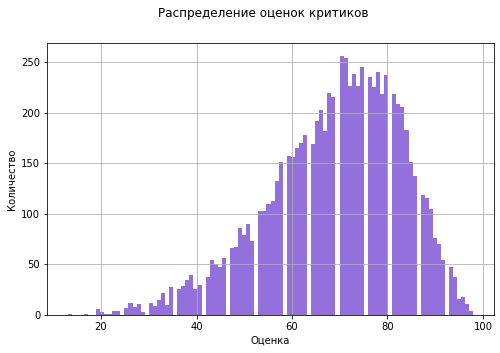

In [33]:
plt.suptitle('Распределение оценок критиков')
plt.ylabel('Количество')
plt.xlabel('Оценка')
games['critic_score'].hist(bins = 100, figsize = (8, 5), color = 'mediumpurple');

Немного смещённое нормальное распределение. Выглядит правдоподобно, оставляем. 

####  Столбец "platform"

Посмотрим уникальные значения:

In [34]:
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Дубликатов нет, оставляем.

####  Столбец "genre"

Посмотрим уникальные значения:

In [35]:
games['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy'], dtype=object)

Дубликатов нет, оставляем.

####  Столбец "user_score"

Посмотрим уникальные значения:

In [36]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Есть значение 'tbd'. Распространённая и подходящая расшифровка - "To be determined", то есть, то же самое, что неизвестно, или NaN.

In [37]:
sum(games['user_score'] == 'tbd') # подсчёт 'tbd'

2424

In [38]:
len(games.loc[games['user_score'].isna()]) # подсчёт NaN 

6699

In [39]:
games.loc[
    games['user_score'] == 'tbd', 'user_score' # 'tbd'
] = np.NaN # будет NaN 
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', '8.8', '6.9', '9.4', '6.8', '6.1',
       '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6', '3.7',
       '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9', '3.1',
       '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3', '2.7',
       '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0', '1.6',
       '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2', '2.3',
       '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'], dtype=object)

In [40]:
len(games.loc[games['user_score'].isna()]) # подсчёт NaN после преобразования

9123

Всё верно, 2424 + 6699 = 9123

Изменим тип данных на числовой.

In [41]:
games['user_score'] = pd.to_numeric(games['user_score'])

games['user_score'].unique() # посмотрим на данные и их тип

array([8. , nan, 8.3, 8.5, 6.6, 8.4, 8.6, 7.7, 6.3, 7.4, 8.2, 9. , 7.9,
       8.1, 8.7, 7.1, 3.4, 5.3, 4.8, 3.2, 8.9, 6.4, 7.8, 7.5, 2.6, 7.2,
       9.2, 7. , 7.3, 4.3, 7.6, 5.7, 5. , 9.1, 6.5, 8.8, 6.9, 9.4, 6.8,
       6.1, 6.7, 5.4, 4. , 4.9, 4.5, 9.3, 6.2, 4.2, 6. , 3.7, 4.1, 5.8,
       5.6, 5.5, 4.4, 4.6, 5.9, 3.9, 3.1, 2.9, 5.2, 3.3, 4.7, 5.1, 3.5,
       2.5, 1.9, 3. , 2.7, 2.2, 2. , 9.5, 2.1, 3.6, 2.8, 1.8, 3.8, 0. ,
       1.6, 9.6, 2.4, 1.7, 1.1, 0.3, 1.5, 0.7, 1.2, 2.3, 0.5, 1.3, 0.2,
       0.6, 1.4, 0.9, 1. , 9.7])

In [42]:
games['user_score'].head() # проверим, изменился ли тип

0    8.0
1    NaN
2    8.3
3    8.0
4    NaN
Name: user_score, dtype: float64

Теперь оценки имеют числовой тип.

####  Столбец "rating"

Посмотрим уникальные значения:

In [43]:
games['rating'].unique()

array(['E', 'unknown', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

Дубликатов нет, оставляем.

### Подсчёт суммарных продаж

In [44]:
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown


In [45]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
games.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,unknown,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,unknown,31.38


Графики выглядят одинаково, с поправкой на меньшее количество значений в первом случае. Удаление данных без года при необходимости не приведёт к смещению выборки. Запомним на будущее.

## Исследовательский анализ данных

### Годы выхода

Посмотрим, сколько игр выпускалось в разные годы.

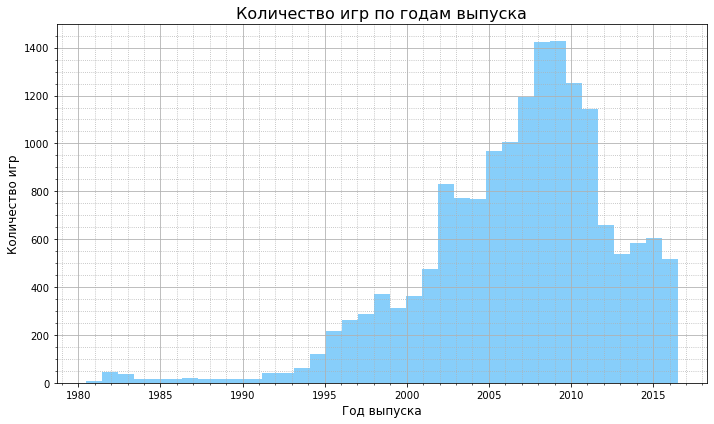

In [46]:
bins = games['year_of_release'].max() - games['year_of_release'].min() + 1 # количество лет
plt.figure(figsize=(10, 6)) # размер
plt.title('Количество игр по годам выпуска', fontsize = 16) # заголовок 
# включаем дополнительные отметки на осях
plt.minorticks_on()
plt.xlabel('Год выпуска', fontsize = 12)
plt.ylabel("Количество игр", fontsize = 12)
# включаем основную сетку
plt.grid(which='major')
# включаем дополнительную сетку
plt.grid(which='minor', linestyle=':')
plt.tight_layout()
plt.hist(games.loc[games['year_of_release'].notna(),'year_of_release'], bins = bins, align='right', color = 'lightskyblue')
plt.show()

Важны ли данные за все периоды?

In [47]:
games.groupby(by=['year_of_release'])['name'].count() # узнаем количество игр за каждый год

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      42
1993      60
1994     120
1995     218
1996     262
1997     289
1998     369
1999     311
2000     363
2001     476
2002     829
2003     771
2004     769
2005     968
2006    1008
2007    1192
2008    1425
2009    1426
2010    1253
2011    1143
2012     660
2013     538
2014     584
2015     604
2016     517
Name: name, dtype: int64

До 1993 года в данных менее 50 игр в год, будет недостаточно для качественного анализа. 
Отбросим данные до 1993 года.


In [48]:
games = games.loc[games['year_of_release']>1993]
games['year_of_release'].unique() # проверка

<IntegerArray>
[2006, 2008, 2009, 1996, 2005, 1999, 2007, 2010, 2013, 2004, 2002, 2001, 2011,
 1998, 2015, 2012, 2014, 1997, 1994, 2016, 2003, 2000, 1995]
Length: 23, dtype: Int16

### Платформы 

Выделим 6 платформ с наибольшими суммарными продажами .

In [49]:
top_platform = games.pivot_table( # создаём новую таблицу
    index = 'platform', # строки - это платформы
    values = 'total_sales', # берём значения столбца с общими продажами
    aggfunc = 'sum' # считаем сумму объявлений и количество
).sort_values(
    by = ['total_sales'], ascending=False # сортируем по убыванию суммы продаж
)[
    0:6 # берём верхние строки
].reset_index() # обновляем индекс
top_platform # смотрим

,platform,total_sales
0,PS2,1247.28
1,X360,961.30
2,PS3,931.34
3,Wii,891.18
4,DS,802.77
5,PS,727.58


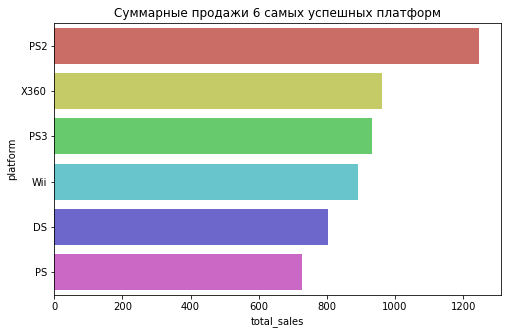

In [50]:
fig, scatter = plt.subplots(figsize = (8,5))
plt.title('Суммарные продажи 6 самых успешных платформ')
sns.barplot(
    x='total_sales', 
    y='platform', 
    data=top_platform,
    ci=None,
    palette='hls', 
);

Сформируем список продаж по годам для платформ с наибольшими суммарными продажами.

In [51]:
top_platform_years = games.pivot_table( # создаём новую таблицу
    index = ('platform', 'year_of_release'), # строки - это платформы
    values = 'total_sales', # берём значения столбца с общими продажами
    aggfunc = ('sum', 'count') # считаем сумму и количество
).sort_values(
    by = ['platform', 'year_of_release'] # сортируем
).reset_index() # обновляем индекс
top_platform_years = top_platform_years[top_platform_years['platform'].isin(list(top_platform['platform']))] 
# оставляем только из топ-списка
top_platform_years.columns=('platform', 'year_of_release','games_released','total_sales')
top_platform_years.head() # смотрим

,platform,year_of_release,games_released,total_sales
15,DS,2004,22,17.01
16,DS,2005,119,130.40
17,DS,2006,200,119.64
18,DS,2007,374,146.68
19,DS,2008,494,145.53


Построим распределение по годам:

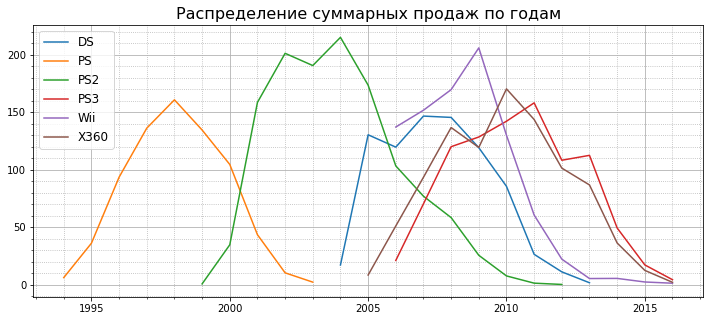

In [52]:
plot_df = top_platform_years.pivot_table(  # соберём новую таблицу
    index='year_of_release',               # для каждого года составим список
    columns='platform',                    # платформ 
    values='total_sales',                  # и их продаж 
    aggfunc='sum'                          # тут будет одно слагаемое
)

fig, ax = plt.subplots(figsize = (12,5))   # размеры графика
labels = plot_df.columns
ax.plot(plot_df)
ax.set_title('Распределение суммарных продаж по годам', fontsize = 16)
ax.minorticks_on()                         # включить второстепенные деления осей
ax.grid(which='major')                     # внешний вид линий основной сетки
ax.grid(which='minor', linestyle = ':')    # внешний вид линий вспомогательной сетки
ax.legend(loc='upper left', labels = list(plot_df.columns), fontsize = 12) # легенда 
plt.show()

Для "X360" и "PS3" выводы делать рано, их графики продаж ещё не снизились до нуля. Но близки к нему потому, что данные за 2016 год неполные, соответственно, и суммы продаж за него занижены.

- PS2 популярна примерно с 1999 до 2012 года, 13 лет
- Wii популярна с 2006 по 2015, 9 лет
- DS популярна с 2004 по 2013, 9 лет
- PS популярна с 1994 по 2003, 9 лет

В среднем платформы появляются и исчезают за 10 лет.

Возьмём данные за актуальный период. 

Основной фактор — эти данные помогут построить прогноз на 2017 год.
Согласно предыдущим исследованиям, данные давностью более 10 лет неактуальны.

Возьмём вдвое меньший период времени, чтобы не захватить отжившие тренды.

In [53]:
games_actual = games.loc[games['year_of_release']>=2012] # выберем 2012 год и младше
games_actual.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,unknown,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,unknown,14.60
34,Call of Duty: Black Ops II,PS3,2012,Shooter,4.99,5.73,0.65,2.42,83.0,5.3,M,13.79


Сформируем список суммарных продаж для платформ с наибольшими суммарными продажами.

In [54]:
top_platform_actual = games_actual.pivot_table( # создаём новую таблицу
    index = 'platform',          # строки - это платформы
    values = 'total_sales',      # берём значения столбца с общими продажами
    aggfunc = 'sum'              # считаем сумму объявлений и количество
).sort_values(
    by = ['total_sales'], ascending=False # сортируем по убыванию суммы продаж
)[
    0:10                         # берём верхние строки
].reset_index()                  # обновляем индекс
top_platform_actual              # смотрим

,platform,total_sales
0,PS4,314.14
1,PS3,291.20
2,X360,238.49
3,3DS,194.63
4,XOne,159.32
5,WiiU,82.19
6,PC,64.39
7,PSV,49.18
8,Wii,35.95
9,DS,12.56


Лидеры продаж:

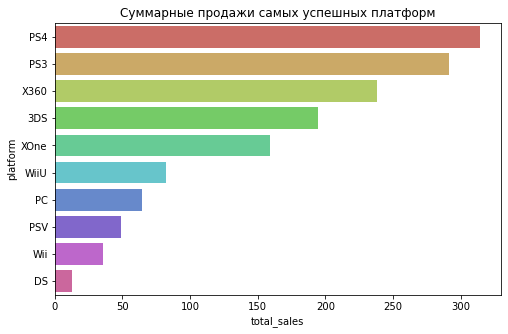

In [55]:
fig, scatter = plt.subplots(figsize = (8,5))
plt.title('Суммарные продажи самых успешных платформ')
sns.barplot(
    x='total_sales', 
    y='platform', 
    palette='hls', 
    data=top_platform_actual,
    ci=None,
);


Соберём сводную таблицу по сумме продаж на платформах в год.

In [56]:
top_platform_actual_by_year = games_actual.pivot_table( # создаём новую таблицу
    index = ('platform', 'year_of_release'), # строки - это платформы и годы
    values = ('total_sales'), # берём значения столбца с общими продажами
    aggfunc = ('sum') # считаем сумму за год
).reset_index() # обновляем индекс
top_platform_actual_by_year = top_platform_actual_by_year[  # оставляем только из топ-списка
    top_platform_actual_by_year['platform'].isin(list(top_platform_actual['platform']))] 
top_platform_actual_by_year.head()  # смотрим

,platform,year_of_release,total_sales
0,3DS,2012,51.20
1,3DS,2013,56.56
2,3DS,2014,43.95
3,3DS,2015,27.78
4,3DS,2016,15.14


Соберём таблицу по годам для этих платформ.

In [57]:
plot_df_actual = top_platform_actual_by_year.pivot_table(
    index='year_of_release', 
    columns='platform', 
    values='total_sales', 
    aggfunc='sum'
)
plot_df_actual

platform,3DS,DS,PC,PS3,PS4,PSV,Wii,WiiU,X360,XOne
year_of_release,,,,,,,,,,
2012,51.20,11.02,22.76,108.23,NaN,16.19,22.10,17.42,101.38,NaN
2013,56.56,1.54,13.18,112.49,25.57,10.49,5.20,21.20,86.72,18.51
2014,43.95,NaN,12.96,49.23,99.28,12.00,5.32,21.89,36.16,53.85
2015,27.78,NaN,9.81,17.06,118.85,6.25,2.20,16.51,12.30,60.38
2016,15.14,NaN,5.68,4.19,70.44,4.25,1.13,5.17,1.93,26.58


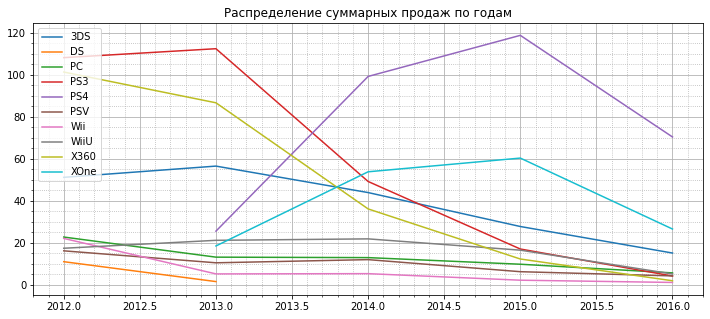

In [58]:
fig, ax = plt.subplots(figsize = (12,5))  # размеры графика
ax.plot(plot_df_actual) # откуда данные
ax.set_title('Распределение суммарных продаж по годам')
ax.minorticks_on() # включить второстепенные деления осей
ax.grid(which='major') # внешний вид линий основной сетки
ax.grid(which='minor', linestyle = ':') # внешний вид линий вспомогательной сетки
ax.legend(loc='upper left', labels = list(plot_df_actual.columns)) # легенда 
plt.show()

По большинству платформ продажи падают. Растут, если не учитывать неполный 2016 год, только продажи игр на платформах 'PS4' и 'XOne'. Эти две платформы можно считать потенциально прибыльными.

Построим диаграмму размаха по глобальным продажам игр в разбивке по платформам.

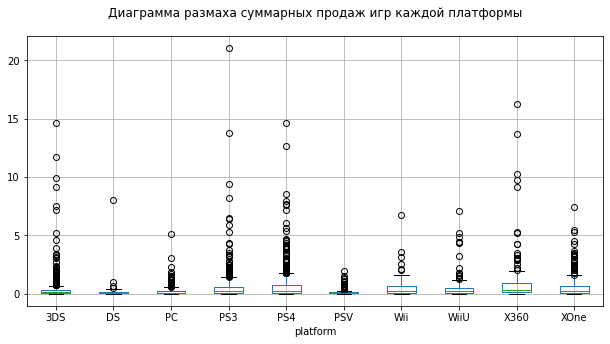

In [59]:
games_actual.loc[
    games_actual['platform'].isin(list(top_platform_actual['platform'])) # отсортируем по топ-листу
].boxplot('total_sales', by = 'platform', figsize = (10, 5))
plt.suptitle('Диаграмма размаха суммарных продаж игр каждой платформы')
plt.title('');

Слишком сильно влияние вылетов, приблизим нижнюю часть.

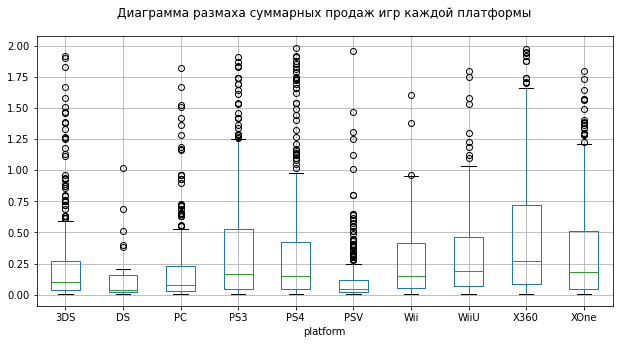

In [60]:
games_actual.loc[
    games_actual['platform'].isin(list(top_platform_actual['platform'])) # отсортируем по топ-листу
].query('total_sales < 2'
).boxplot('total_sales', by = 'platform', figsize = (10, 5))
plt.suptitle('Диаграмма размаха суммарных продаж игр каждой платформы')
plt.title('');

Что мы видим:
- Для части платформ годовые продажи отличаются широко, как, например, "X360", чуть меньше "PS4", "PS3" и "XOne".
- Медиана выше всего у "X360", "WiiU", "XOne", "PS4", "PS3", "Wii"

### Влияние оценок на продажи.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.

Это платформой будет "PS4" - первая в рейтинге продаж за последние годы.

#### Исследование по платформе "PS4"

In [61]:
PS4 = games_actual.loc[games_actual['platform'] == 'PS4']

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

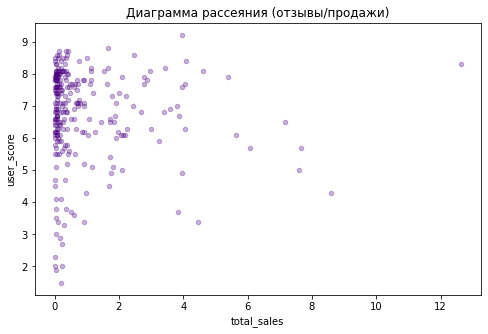

In [62]:
PS4.plot(x='total_sales',
         y='user_score', 
         kind='scatter', 
         alpha=0.3, 
         color = 'indigo',
         figsize = (8, 5),
         title = 'Диаграмма рассеяния (отзывы/продажи)');

Пока видно, что в зоне высоких оценок точки расположены густо, а вниз, к низким оценкам, спускается узкий "хвост", говорящий и о низких продажах.

Игры с очень высокими продажами редко имеют низкие оценки.

Приблизим левую часть графика.

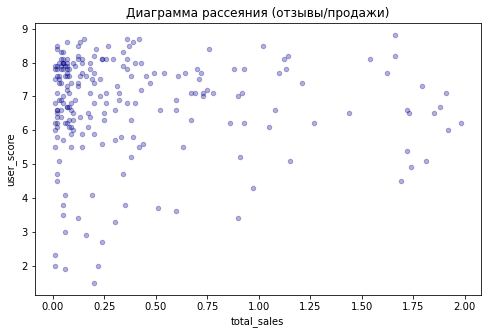

In [63]:
PS4.query('total_sales < 2'
).plot(x='total_sales',
          y='user_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'darkblue', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (отзывы/продажи)');

Диаграмма рассеяния имеет треугольный вид, игры с высокими оценками пользователей чаще имеют высокие продажи. 

Однако есть много игр с высокими оценками, но низкими продажами.

Посчитаем корреляцию между отзывами и продажами:

In [64]:
PS4['total_sales'].corr(PS4['user_score'])

-0.03195711020455643

Корреляция обратная, очень слабая.

**Оценки критиков**

Построим диаграмму рассеяния и посчитаем корреляцию между оценками и продажами.

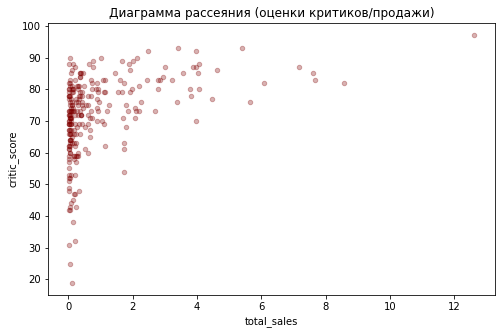

In [65]:
PS4.plot(x='total_sales',
          y='critic_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'maroon', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (оценки критиков/продажи)');

В зоне средних оценок точки расположены густо, а вниз, к низким оценкам, спускается узкий "хвост", говорящий и о низких продажах.

Игры с очень высокими продажами редко имеют низкие оценки.

Приблизим левую часть графика.

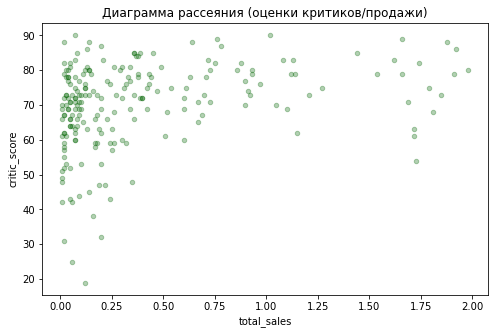

In [66]:
PS4.query('total_sales < 2'
).plot(x='total_sales',
          y='critic_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'darkgreen', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (оценки критиков/продажи)');

Диаграмма рассеяния имеет треугольный вид, игры с высокими оценками критиков чаще имеют высокие продажи. 

Посчитаем корреляцию между оценками критиков и продажами:

In [67]:
PS4['total_sales'].corr(PS4['critic_score'])

0.40656790206178123

Корреляция прямая, слабая.

Проверим полученные выводы на ещё двух платформах: "X360" и "XOne".

#### Исследование по платформе "X360"

In [68]:
X360 = games_actual.loc[games_actual['platform'] == 'X360']

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

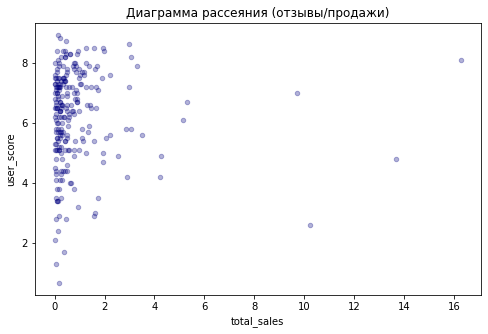

In [69]:
X360.plot(x='total_sales',
          y='user_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'navy', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (отзывы/продажи)');

Пока видно, что в зоне высоких оценок точки расположены густо, а вниз, к низким оценкам, спускается узкий "хвост", говорящий и о низких продажах.

Игры с очень высокими продажами редко имеют низкие оценки.

Приблизим левую часть графика.

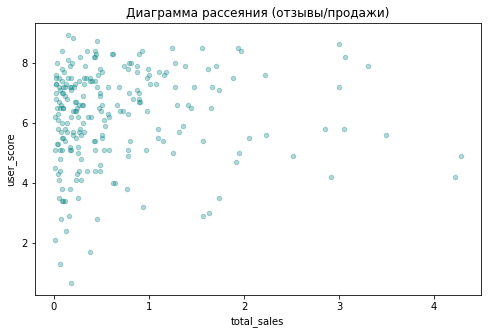

In [70]:
X360.query('total_sales < 5'
).plot(x='total_sales',
          y='user_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'teal', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (отзывы/продажи)');

Диаграмма рассеяния имеет треугольный вид, игры с высокими оценками пользователей чаще имеют высокие продажи. 

Однако есть много игр с высокими оценками, но низкими продажами.

Посчитаем корреляцию между отзывами и продажами:

In [71]:
X360['total_sales'].corr(X360['user_score'])

0.006460086885586438

Корреляция прямая, но очень слабая. 

**Оценки критиков**

Построим диаграмму рассеяния и посчитаем корреляцию между оценками  и продажами.

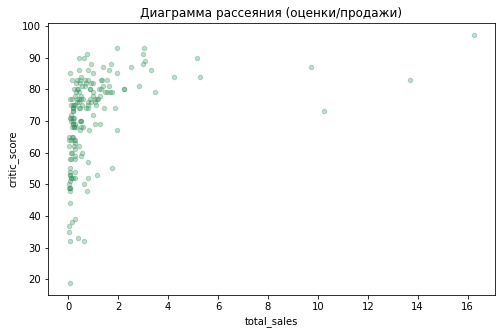

In [72]:
X360.plot(x='total_sales',
          y='critic_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'seagreen', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (оценки/продажи)');

В зоне средних оценок точки расположены густо, а вниз, к низким оценкам, спускается узкий "хвост", говорящий и о низких продажах.

Игры с очень высокими продажами редко имеют низкие оценки.

Приблизим левую часть графика.

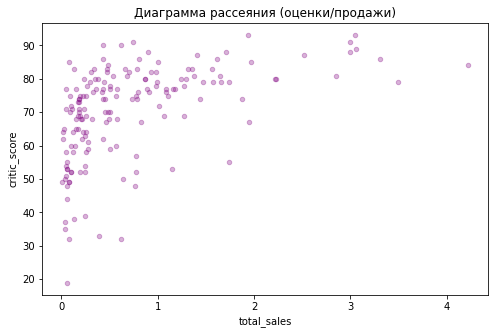

In [73]:
X360.query('total_sales < 5'
).plot(x='total_sales',
          y='critic_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'purple', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (оценки/продажи)');

Диаграмма рассеяния имеет треугольный вид, игры с высокими оценками критиков чаще имеют высокие продажи. 

Посчитаем корреляцию между оценками критиков и продажами:

In [74]:
X360['total_sales'].corr(X360['critic_score'])

0.35937570023302

Корреляция прямая, слабая, но сильнее, чем у оценок пользователей.

При прогнозировании продаж более информативным будет опираться на оценки критиков, а не пользователей. Чем выше оценки, тем выше продажи.

#### Исследование по платформе "XOne"

In [75]:
XOne = games_actual.loc[games_actual['platform'] == 'XOne']

Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.

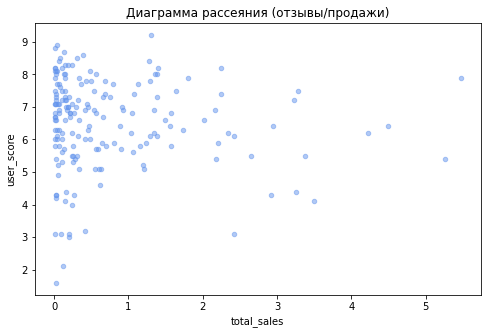

In [76]:
XOne.plot(x='total_sales',
          y='user_score', 
          kind='scatter', 
          alpha=0.5, 
          color = 'cornflowerblue', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (отзывы/продажи)');

##### Диаграмма рассеяния имеет треугольный вид, игры с высокими оценками пользователей чаще имеют высокие продажи. 

Однако есть много игр с высокими оценками, но низкими продажами.

Посчитаем корреляцию между отзывами и продажами:

In [77]:
XOne['total_sales'].corr(XOne['user_score'])

-0.06892505328279418

Корреляция обратная, очень слабая.

**Оценки критиков**

Построим диаграмму рассеяния и посчитаем корреляцию между оценками и продажами.

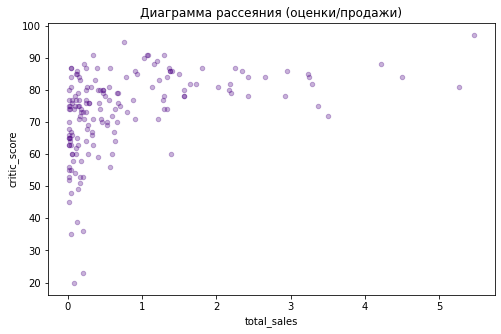

In [78]:
XOne.plot(x='total_sales',
          y='critic_score', 
          kind='scatter', 
          alpha=0.3, 
          color = 'indigo', 
          figsize = (8, 5),
          title = 'Диаграмма рассеяния (оценки/продажи)');

Диаграмма рассеяния имеет треугольный вид, игры с высокими оценками критиков чаще имеют высокие продажи. 

Посчитаем корреляцию между оценками критиков и продажами:

In [79]:
XOne['total_sales'].corr(XOne['critic_score'])

0.41699832800840153

Корреляция прямая, слабая.

При прогнозировании продаж более информативным будет опираться на оценки критиков, а не пользователей. Чем выше оценки, тем выше продажи.

### Влияние жанра на продажи.

Сформируем диаграмму размаха суммарных продаж игр каждого жанра. 

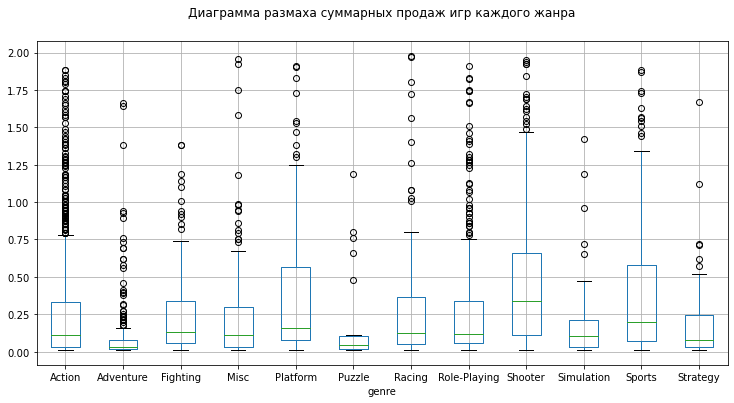

In [80]:
games_actual.query('total_sales < 2'
).boxplot('total_sales', by = 'genre', figsize = (12, 6))
plt.suptitle('Диаграмма размаха суммарных продаж игр каждого жанра')
plt.title('');

- Жанры с высокими продажами -  "Shooter", "Sports", "Platform", "Action"

- Самые низкие продажи у жанров "Strategy", "Puzzle", "Adventure", "Puzzle"

## Портрет пользователя каждого региона.

### Сравнение платформ

Собираем таблицу для Северной Америки.

In [81]:
top_platform_na = games_actual.pivot_table( 
    index = 'platform', 
    values = 'na_sales', 
    aggfunc = 'sum' 
).sort_values(
    by = ['na_sales'], ascending=False 
)[
    0:5 
].reset_index() 
top_platform_na 

,platform,na_sales
0,X360,141.09
1,PS4,108.74
2,PS3,103.89
3,XOne,93.12
4,3DS,55.33


Рисуем график

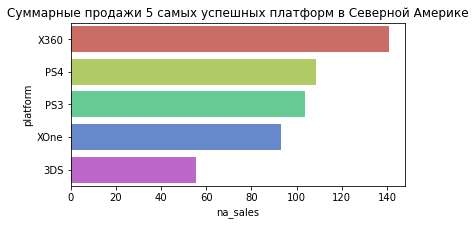

In [82]:
fig, scatter = plt.subplots(figsize = (6,3))
plt.title('Суммарные продажи 5 самых успешных платформ в Северной Америке')
sns.barplot(
    x='na_sales', 
    y='platform', 
    data=top_platform_na,
    ci=None,
    palette='hls',
);

Самые популярные платформы: X360, PS4, PS3, XOne, 3DS.

Собираем таблицу для Европы.

In [83]:
top_platform_eu = games_actual.pivot_table( 
    index = 'platform',
    values = 'eu_sales', 
    aggfunc = 'sum' 
).sort_values(
    by = ['eu_sales'], ascending=False 
)[
    0:5 
].reset_index() 
top_platform_eu

,platform,eu_sales
0,PS4,141.09
1,PS3,107.85
2,X360,75.24
3,XOne,51.59
4,3DS,42.64


Рисуем график

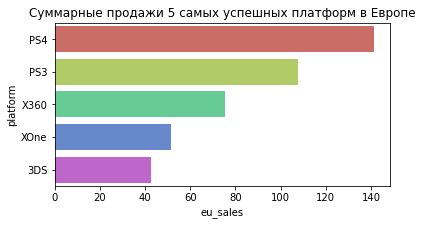

In [84]:
fig, scatter = plt.subplots(figsize = (6,3))
plt.title('Суммарные продажи 5 самых успешных платформ в Европе')
sns.barplot(
    x='eu_sales', 
    y='platform', 
    data=top_platform_eu,
    ci=None,
    palette='hls',
);

Самые популярные платформы: PS4, PS3, X360, XOne, 3DS. Те же, что и в Северной Америке, только X360 уходит на 3 место.

Собираем таблицу для Японии.

In [85]:
top_platform_jp = games_actual.pivot_table(    # создаём новую таблицу
    index = 'platform',                        # строки - это платформы
    values = 'jp_sales',                       # берём значения столбца с продажами
    aggfunc = 'sum'                            # считаем сумму объявлений
).sort_values(
    by = ['jp_sales'], ascending=False         # сортируем по убыванию суммы продаж
)[
    0:5                                        # берём верхние строки
].reset_index() 
top_platform_jp

,platform,jp_sales
0,3DS,87.79
1,PS3,35.84
2,PSV,21.04
3,PS4,15.96
4,WiiU,13.01


Рисуем график.

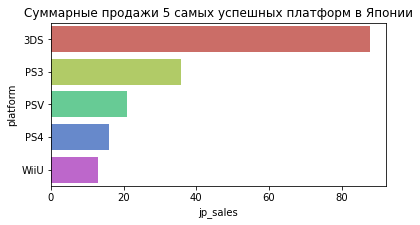

In [86]:
fig, scatter = plt.subplots(figsize = (6,3))
plt.title('Суммарные продажи 5 самых успешных платформ в Японии')
sns.barplot(
    x='jp_sales', 
    y='platform', 
    data=top_platform_jp,
    ci=None,
    palette='hls',
);

Самые популярные платформы: 3DS, PS3, PSV, PSP, Wii. 

В отличие от Европы и Северной Америки, на первое и  третье места выходят портативные платформы: Nintendo 3DS и PSV.

### Сравнение жанров

Собираем таблицу для Северной Америки.

In [87]:
top_genre_na = games_actual.pivot_table(    # создаём новую таблицу
    index = 'genre',                        # строки - это жанры
    values = 'na_sales',                    # берём значения столбца с продажами
    aggfunc = 'sum'                         # считаем сумму объявлений и количество
).sort_values(
    by = ['na_sales'], ascending=False      # сортируем по убыванию суммы продаж
).reset_index()  
top_genre_na 

,genre,na_sales
0,Action,178.48
1,Shooter,144.77
2,Sports,82.99
3,Role-Playing,64.00
4,Misc,38.19
5,Platform,25.38
6,Fighting,19.79
7,Racing,17.43
8,Adventure,8.92
9,Simulation,7.99


Жанры, кроме первых топ-5, обозначим как "Other".

In [88]:
top_genre_na['genre'][5] = "Other" # присваиваем имя 
top_genre_na['na_sales'][5] = top_genre_na['na_sales'][5:].sum() #суммируем продажи, начиная с 6й строки
top_genre_na = top_genre_na[0:6] # удаляем строки после 6й
top_genre_na # смотрим

,genre,na_sales
0,Action,178.48
1,Shooter,144.77
2,Sports,82.99
3,Role-Playing,64.00
4,Misc,38.19
5,Other,84.88


Собираем таблицу для Европы. Жанры, кроме первых топ-5, обозначим как "Other".

In [89]:
top_genre_eu = games_actual.pivot_table(    # создаём новую таблицу
    index = 'genre',                        # строки - это жанры
    values = 'eu_sales',                    # берём значения столбца с продажами
    aggfunc = 'sum'                         # считаем сумму объявлений и количество
).sort_values(
    by = ['eu_sales'], ascending=False      # сортируем по убыванию суммы продаж
).reset_index() # обновляем индекс
top_genre_eu['genre'][5] = "Other"          # присваиваем имя местам с 6 по последнее
top_genre_eu['eu_sales'][5] = top_genre_eu['eu_sales'][5:].sum() #суммируем продажи, начиная с 6й строки
top_genre_eu = top_genre_eu[0:6]            # удаляем строки после 6й
top_genre_eu # смотрим

,genre,eu_sales
0,Action,160.90
1,Shooter,113.47
2,Sports,70.77
3,Role-Playing,48.53
4,Racing,27.43
5,Other,89.20


Собираем таблицу для Японии. Жанры, кроме первых топ-5, обозначим как "Other".

In [90]:
top_genre_jp = games_actual.pivot_table(     # создаём новую таблицу
    index = 'genre',                         # строки - это жанры
    values = 'jp_sales',                     # берём значения столбца с продажами
    aggfunc = 'sum'                          # считаем сумму объявлений и количество
).sort_values(
    by = ['jp_sales'], ascending=False       # сортируем по убыванию суммы продаж
).reset_index()
top_genre_jp['genre'][5] = "Other"           # присваиваем имя местам с 6 по последнее
top_genre_jp['jp_sales'][5] = top_genre_jp['jp_sales'][5:].sum() #суммируем продажи, начиная с 6й строки
top_genre_jp = top_genre_jp[0:6]             # удаляем строки после 6й
top_genre_jp # смотрим

,genre,jp_sales
0,Role-Playing,65.44
1,Action,53.73
2,Misc,12.86
3,Simulation,10.41
4,Fighting,9.44
5,Other,41.63


Рисуем графики.

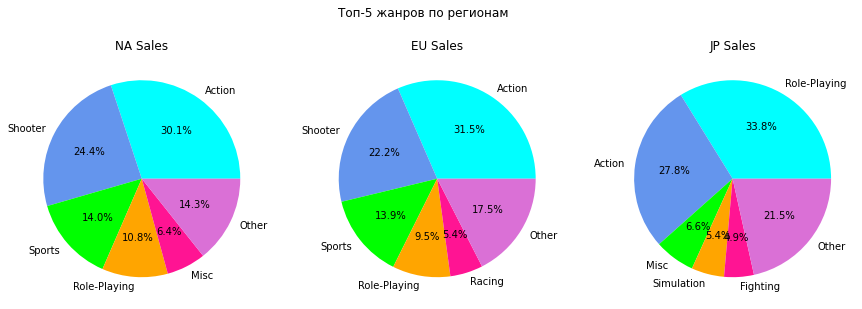

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(15, 5))
colors = ['cyan', 'cornflowerblue', 'lime', 'orange', 'deeppink', 'orchid']
plt.suptitle('Топ-5 жанров по регионам')
axs[0].set_title("NA Sales")
axs[0].pie(top_genre_na['na_sales'], labels=top_genre_na['genre'], autopct='%1.1f%%', colors = colors)
axs[1].set_title("EU Sales")
axs[1].pie(top_genre_eu['eu_sales'], labels=top_genre_eu['genre'], autopct='%1.1f%%', colors = colors)
axs[2].set_title("JP Sales")
axs[2].pie(top_genre_jp['jp_sales'], labels=top_genre_jp['genre'], autopct='%1.1f%%', colors = colors);

Жанровые предпочтения в Северной Америке и Европе практически одинаковые. Больше 30% продаж - Action, далее по убыванию Shooter, Sports, Role-playing.

В Японии же на первом месте с 33,8% продаж уверенно Role-Playing, затем с 27,8% Action, доли остальных существенно ниже.


### Влияние рейтинга ESRB


ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию

Категории, встречающиеся в датасете:



In [92]:
games_actual['rating'].unique()

array(['M', 'unknown', 'E', 'E10+', 'T'], dtype=object)

- «E» («Everyone») — «Для всех»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам 13+»
- «M» («Mature») — «Для взрослых»
- «unknown» - наша "заглушка" на замену пустым ячейкам.


Продажи игр в Северной Америке в зависимости от возрастного рейтинга:

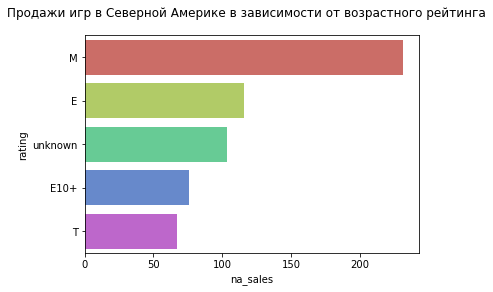

In [93]:
esrb_rating_na = games_actual.pivot_table(   # создаём новую таблицу
    index = 'rating',                        # строки - это рейтинг
    values = 'na_sales',                     # берём значения столбца с продажами
    aggfunc = 'sum'                          # считаем сумму 
).sort_values(
    by = ['na_sales'], ascending = False     # сортируем по сумме продаж
).reset_index()
plt.suptitle('Продажи игр в Северной Америке в зависимости от возрастного рейтинга')
sns.barplot(
    x='na_sales', 
    y='rating', 
    data=esrb_rating_na,
    ci=None,
    palette='hls',
);

Самые высокие продажи у игр категории "Для взрослых", далее "Для всех", затем категория без рейтинга, после "Для всех от 10 лет и старше", и замыкает рейтинг "Подросткам от 13 лет"

График продаж игр в Европе в зависимости от возрастного рейтинга:

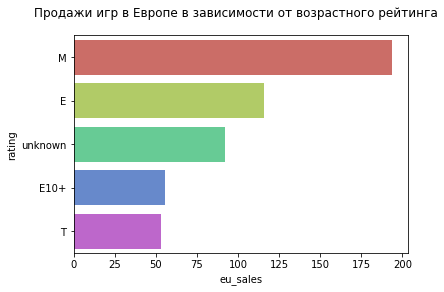

In [94]:
esrb_rating_eu = games_actual.pivot_table(  # создаём новую таблицу
    index = 'rating',                       # строки - это рейтинг
    values = 'eu_sales',                    # берём значения столбца с продажами
    aggfunc = 'sum'                         # считаем сумму объявлений и количество
).sort_values(
    by = ['eu_sales'], ascending = False                      
).reset_index()
plt.suptitle('Продажи игр в Европе в зависимости от возрастного рейтинга')
sns.barplot(
    x='eu_sales', 
    y='rating', 
    data=esrb_rating_eu,
    ci=None,
    palette='hls',
);

- Самые высокие продажи у игр категории "Для взрослых", затем "Для всех", далее затем категория без рейтинга.
- Продажи игр "10+" и "13+" ниже.

График продаж игр в Японии в зависимости от возрастного рейтинга:

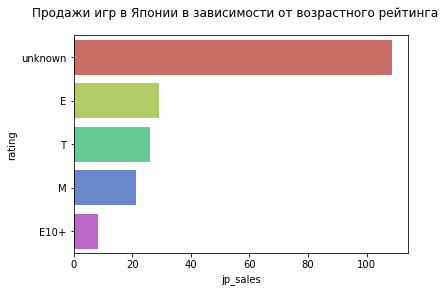

In [95]:
esrb_rating_jp = games_actual.pivot_table(    # создаём новую таблицу
    index = 'rating',                         # строки - это рейтинг
    values = 'jp_sales',                      # берём значения столбца с продажами
    aggfunc = 'sum'                           # считаем сумму объявлений и количество
).sort_values(
    by = ['jp_sales'],
    ascending = False                               
).reset_index()
plt.suptitle('Продажи игр в Японии в зависимости от возрастного рейтинга')
sns.barplot(
    x='jp_sales', 
    y='rating', 
    data=esrb_rating_jp,
    ci=None,
    palette='hls',
);

- Самые высокие продажи у игр без категории. Возможная причина - рейтинг предназначен для США и Канады, и для других регионов может не заполняться.
- Значительно меньше продаж у игр категорий "Для всех", далее "Подросткам от 13 лет", затем "Для взрослых".
- Самые низкие - у игр "10+"

## Проверка гипотез

###  Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

*Нулевая гипотеза H₀ всегда формулируется так, чтобы использовать знак равенства.  Альтернативная гипотеза H₁ - это утверждение, которое принимается верным, если отбрасывается H₀.*

**Нулевая гипотеза: средние пользовательские рейтинги платформ Xbox One и PC равны**

*Альтернативная гипотеза: средние пользовательские рейтинги платформ Xbox One и PC отличаются.*

Посмотрим, сколько значений на каждой платформе.

In [96]:
# предварительно уберём бесполезные строки без пользовательских оценок
games_actual = games_actual.dropna(subset=['user_score']).reset_index(drop=True)
games_actual[games_actual['platform'].isin([
    'XOne', 'PC'                        # выберем из датасета строки с интересующими платформами
])]['platform'].value_counts()          # и посчитаем количество


PC      210
XOne    182
Name: platform, dtype: int64

Количество данных отличается.

Дисперсия пользовательских рейтингов:

In [97]:
print('Дисперсия для Xbox One:', '%.3f' %(np.var(games_actual[games_actual['platform'] == 'XOne']['user_score'])))
print('Дисперсия для PC:', '%.3f' %(np.var(games_actual[games_actual['platform'] == 'PC']['user_score'])))

Дисперсия для Xbox One: 1.897
Дисперсия для PC: 2.720


* Размеры выборок отличаются (210 и 182 значений)
* Дисперсии выборок отличаются (1,9 и 2,7)

Следовательно, зададим параметр, задающий равенство выборок "equal_var" = False

Рассчитаем средние оценки:

In [98]:
print("Средние оценки игр для XBox One", '%.3f' %(games_actual[games_actual['platform'] == 'XOne']['user_score'].mean()))
print("Средние оценки игр для PC", '%.3f' %(games_actual[games_actual['platform'] == 'PC']['user_score'].mean()))

Средние оценки игр для XBox One 6.521
Средние оценки игр для PC 6.431


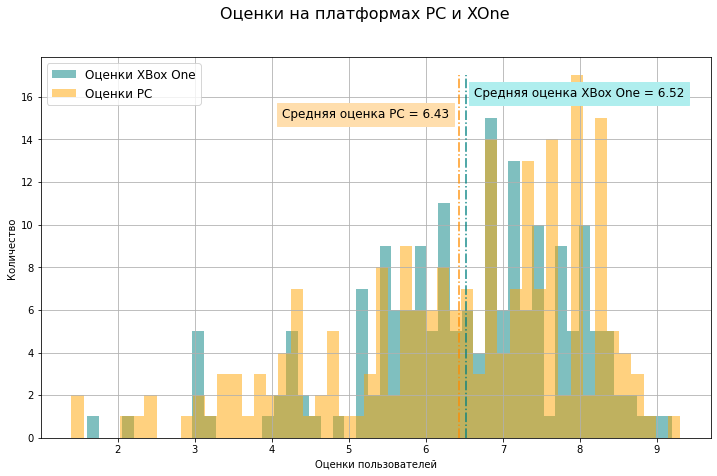

In [99]:
score_XOne = games_actual[games_actual['platform'] == 'XOne']['user_score']       # выделим данные
mean_score_XOne = round(score_XOne.mean(), 2)                                     # посчитаем среднюю
mean_score_XOne_label = f'Cредняя оценка XBox One = {mean_score_XOne}'                # сделаем подпись
score_PC = games_actual[games_actual['platform'] == 'PC']['user_score']           # выделим данные
mean_score_PC = round(score_PC.mean(), 2)                                         # посчитаем среднюю 
mean_score_PC_label = f'Cредняя оценка PC = {mean_score_PC}'                      # сделаем подпись
plt.figure(figsize=(12, 7))                                                       # размер графика
plt.suptitle('Оценки на платформах PC и XOne', fontsize = 16)             # заголовок 
plt.text (mean_score_XOne+0.1, 16, mean_score_XOne_label, backgroundcolor='paleturquoise', fontsize = 12) 
plt.vlines (mean_score_XOne, 0, 17, color='teal', alpha = 0.9, linestyles='dashdot')       # линия средней
plt.hist(score_XOne, bins = 50, alpha = 0.5, label='Оценки XBox One', color='teal')            # первый график
plt.text (mean_score_PC-2.3, 15, mean_score_PC_label, backgroundcolor='navajowhite', fontsize = 12) 
plt.vlines (mean_score_PC, 0, 17, color = 'darkorange', alpha = 0.9, linestyles='dashdot') # линия средней
plt.hist(score_PC, bins = 50,  alpha = 0.5, label='Оценки PC', color='orange')             # второй график
plt.xlabel('Оценки пользователей')                                                # подпись горизонтальной оси 
plt.ylabel('Количество')                                                          # подпись вертикальной оси  
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)                                       # легенда 
plt.show();

Зададим уровень значимости в 1%, чтобы вероятность получить такое или большее различие между средними значениями выборки случайно было меньше 1%.

Проведём T-тест.
Если результат меньше 1%, то нулевую гипотезу следует отвергнуть.

In [100]:
alpha = .01 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_actual[games_actual['platform'] == 'XOne']['user_score'], # первая выборка
    games_actual[games_actual['platform'] == 'PC']['user_score'],  # вторая выборка
    equal_var = False 
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5553236801948749
Не получилось отвергнуть нулевую гипотезу


Вероятность случайно получить такое различие средних значима. Около 55% и больше заданного уровня значимости в 1%.

**Делаем вывод, что средние пользовательские рейтинги игр для PC и Xbox One равны.**

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные.

**Нулевая гипотеза: средние пользовательские рейтинги жанров Action и Sports равны**

*Альтернативная гипотеза: средние пользовательские рейтинги жанров Action и Sports отличаются.*

Посмотрим, сколько значений в каждом из жанров.

In [101]:
games_actual[games_actual['genre'].isin([
    'Action', 'Sports' # выберем из датасета строки с интересующими платформами
])]['genre'].value_counts() # и посчитаем количество


Action    529
Sports    197
Name: genre, dtype: int64

Количество данных отличается.

Дисперсия пользовательских рейтингов:

In [102]:
print('Дисперсия для Action:', '%.3f' %(np.var(games_actual[games_actual['genre'] == 'Action']['user_score'])))
print('Дисперсия для Sports:', '%.3f' %(np.var(games_actual[games_actual['genre'] == 'Sports']['user_score'])))

Дисперсия для Action: 1.869
Дисперсия для Sports: 3.032


Для Sports дисперсия выше, а данных меньше.

* Размеры выборок отличаются (529 и 197 значений)
* Дисперсии выборок отличаются (1,9 и 3)

Следовательно, зададим параметр, задающий равенство выборок "equal_var" = False

Рассчитаем средние оценки:

In [103]:
print("Средние оценки игр жанра Action", '%.3f' %(games_actual[games_actual['genre'] == 'Action']['user_score'].mean()))
print("Средние оценки игр жанра Sports", '%.3f' %(games_actual[games_actual['genre'] == 'Sports']['user_score'].mean()))

Средние оценки игр жанра Action 6.825
Средние оценки игр жанра Sports 5.480


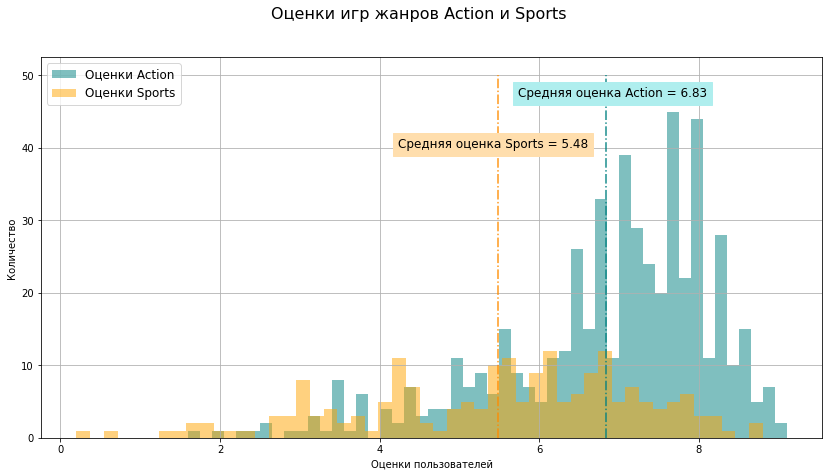

In [104]:
score_action = games_actual[games_actual['genre'] == 'Action']['user_score']       # выделим данные
mean_score_action = round(score_action.mean(), 2)                                  # посчитаем среднюю
mean_score_action_label = f'Cредняя оценка Action = {mean_score_action}'           # сделаем подпись
score_sports = games_actual[games_actual['genre'] == 'Sports']['user_score']       # выделим данные
mean_score_sports = round(score_sports.mean(), 2)                                  # посчитаем среднюю 
mean_score_sports_label = f'Cредняя оценка Sports = {mean_score_sports}'           # сделаем подпись
plt.figure(figsize=(14, 7))                                                        # размер графика
plt.suptitle('Оценки игр жанров Action и Sports', fontsize = 16)                   # заголовок 
plt.text (mean_score_action-1.1, 47, mean_score_action_label, backgroundcolor='paleturquoise', fontsize = 12) 
plt.vlines (mean_score_action, 0, 50, color='teal', alpha = 0.9, linestyles='dashdot')        # линия средней
plt.hist(score_action, bins = 50, alpha = 0.5, label='Оценки Action', color='teal')           # первый график
plt.text (mean_score_sports-1.25, 40, mean_score_sports_label, backgroundcolor='navajowhite', fontsize = 12) 
plt.vlines (mean_score_sports, 0, 50, color = 'darkorange', alpha = 0.9, linestyles='dashdot')# линия средней
plt.hist(score_sports, bins = 50,  alpha = 0.5, label='Оценки Sports', color='orange')        # второй график
plt.xlabel('Оценки пользователей')                                                # подпись горизонтальной оси 
plt.ylabel('Количество')                                                          # подпись вертикальной оси  
plt.grid(True)
plt.legend(loc='upper left', fontsize = 12)                                       # легенда 
plt.show();

Зададим уровень значимости в 1%, чтобы вероятность получить такое или большее различие между средними значениями выборки случайно было меньше 1%.

Проведём T-тест.
Если результат меньше 1%, то нулевую гипотезу следует отвергнуть.

In [105]:
alpha = .05 # критический уровень статистической значимости
# если p-value окажется меньше него - отвергнем гипотезу

results = st.ttest_ind(
    games_actual[games_actual['genre'] == 'Action']['user_score'], # первая выборка
    games_actual[games_actual['genre'] == 'Sports']['user_score'],  # вторая выборка
    equal_var = False 
)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 1.209859410912237e-19
Отвергаем нулевую гипотезу


Вероятность случайно получить такое различие средних крайне мала. Около 10 в -19 степени процентов и меньше заданного уровня значимости в 1%.

**Делаем вывод, что средние пользовательские рейтинги игр для жанров Action и Sports отличаются.**

## Общий вывод.

- Растут продажи игр на платформах 'PS4' и 'XOne'. Эти две платформы можно считать потенциально прибыльными.
- При планировании кампании в Японии полезно обратить внимание на игры для портативных платформ, на первом месте по продажам - Nintendo 3DS.
- В Европе и Америке жанры с высокими продажами - "Shooter", "Sports", "Platform"
- При прогнозировании продаж полезно опираться на оценки критиков. Чем выше оценки, тем выше продажи. Оценки пользователей не коррелируют с продажами, их можно не учитывать.
- В Японии на первом месте по продажам находится жанр ролевых игр.
- Самые высокие продажи в Америке и Европе у игр с рейтингом ESRB "Для взрослых", далее "Для всех"
- В Японии рейтинг ESRB не влияет на продажи, в разработке региональной кампании его не учитывать.

Всё это можно использовать при планировании кампании на 2017 год.